In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

sns.set()

%config InlineBackend.figure_format = 'png' #set 'png' here when working in notebook
%matplotlib inline

trainData = 'train.csv'
testData = 'test.csv'

train = pd.read_csv(trainData, header=0)
test = pd.read_csv(testData, header=0)

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [65]:
# Feature engineering, przykład
# Możemy tworzyć nowe kolumny wykorzystując dotychczasowe (dzieląc jedną przez drugą, mnożąc, podnosząc do potęgi, itd)
# all_data['my_feature'] = all_data['LotArea']/all_data['LotFrontage']

In [ ]:
# Feature engineering, przykład
# Możemy wyciągać informacje które uznajemy za cenne z łańcuchów znaków
# data['full_name'][0] -> 'Mr Adam Smith'
# data['full_name'][1] -> 'Mrs Anna Hertz'
# Tworzymy nową kolumnę 'personal_title'
# data['personal_title'].unique() -> ['Mr', 'Mrs', 'Ms', '']
# data['personal_title'][0] -> 'Mr'
# data['personal_title'][1] -> 'Mrs'

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
all_data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150], dtype=int64)

### Data processing steps:
1. usuń outliersy  
2. zamien zmienne numeryczne na stringi, jezeli dotyczą one atrybutów kategorycznych (jak np. lata, miesiące, dni tygodnia itp)    3. znormalizuj mocno skośne zmienne numeryczne  
4. utworz dummy variables z atrybutow kategorycznych  
5. uzupełnij brakujące wartości średnimi atrybutów  
6. utworz macierze do modelów regresyjnych


## Outliers

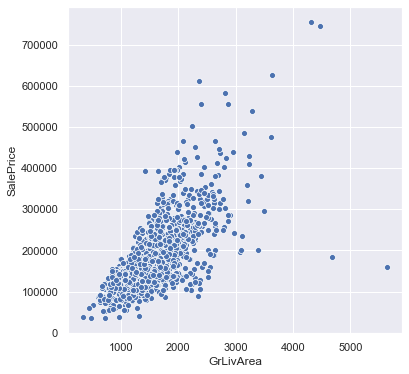

In [8]:
rcParams['figure.figsize'] = (6.0, 6.0) 
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()

In [9]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index).reset_index(drop=True)

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

## Konwersja numerycznych na kat 

In [14]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [17]:
all_data['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [ ]:
#all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#all_data['YrSold'] = all_data['YrSold'].astype(str)
#all_data['MoSold'] = all_data['MoSold'].astype(str)

## Enkodowanie zmiennych kategorycznych - Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [21]:
all_data['FireplaceQu'].unique()

array([5, 4, 2, 1, 0, 3], dtype=int64)

In [ ]:
"""
Kodowanie zmiennych kategorycznych

Na początku zawsze jest jedna kolumna -> 'Gender': wartości -> 'M', 'F', 'U'

Zadanie: Kodowanie kolumny 'Gender':

Rozwiązanie 1: Zamiana kategorii na liczby, pozostawienie jednej kolumny (ostrożnie, możemy dostać 'Female' = 2* 'Male', nie ma sensu)
Efekt: Kolumna 'Gender': wartości -> 0, 1, 2

2. Zamiana kolumny na nową liczbę kolumn odpowiadającą liczbie kategorii
Efekt: 3 kolumny -> 'Gender_M', 'Gender_F', 'Gender_U': wartości -> 0, 1


"""

## Normalizacja 

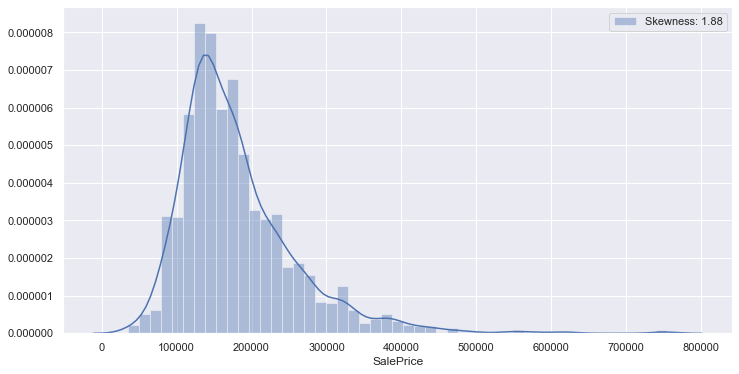

In [22]:
from scipy.stats import skew
# współczynnik skośności: https://pl.wikipedia.org/wiki/Wsp%C3%B3%C5%82czynnik_sko%C5%9Bno%C5%9Bci
# https://www.naukowiec.org/wzory/statystyka/wspolczynnik-skosnosci_12.html

rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure
g = sns.distplot(train["SalePrice"], label="Skewness: %.2f"%(train["SalePrice"].skew()))
g = g.legend(loc="best")
plt.show()

In [ ]:
# Feature enginnering, przykład
# 'bining', podzielenie zmiennej ciągłej na zakresy i przypisanie każdej etykiety
# Zmieńmy kontekst na projekt końcowy, zauważamy, że odsetek spłacanych pożyczek powyżej 400000 jest bardzo duży
# Możemy stworzyć nową kolumnę z 'flagą' mówiącą o tym czy pożyczka jest wysoka czy nie, model sprawdzi czy jest korzyść
# z traktowania tej grupy pożyczkobiorców osobno
# data['is_loan_high']: wartości -> 0,1

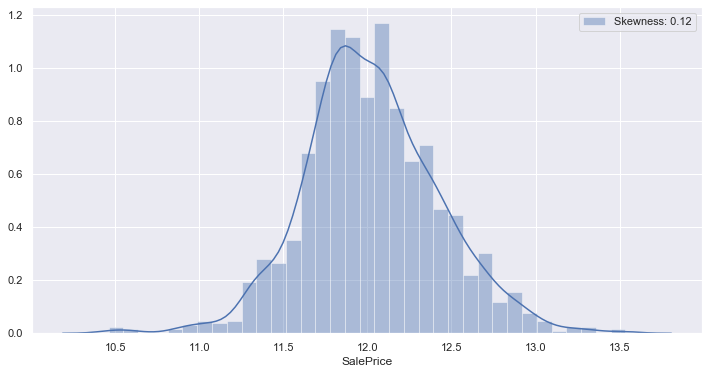

In [23]:
import numpy as np
normalizedSalePrice = np.log1p(train["SalePrice"])

rcParams['figure.figsize'] = (12.0, 6.0) 
g = sns.distplot(normalizedSalePrice, label="Skewness: %.2f"%(normalizedSalePrice.skew()))
g = g.legend(loc="best")
plt.show()

In [24]:
train["SalePrice"] = np.log1p(train["SalePrice"]) 

In [25]:
def get_skewed_features():
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) # computes "skewness"
    skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
    return skewed_feats.index

In [26]:
from sklearn.preprocessing import power_transform

skewed_feats = get_skewed_features()
print("{} heavily skewed features.".format(len(skewed_feats)))

all_data[skewed_feats] = power_transform(all_data[skewed_feats], method='yeo-johnson')
print("Applied power transform.")

37 heavily skewed features.
Applied power transform.


In [27]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 219)

In [30]:
all_data.isnull().sum()

MSSubClass                 0
LotFrontage              486
LotArea                    0
Street                     0
Alley                      0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 219, dtype: int64

In [31]:
all_data = all_data.fillna(all_data.mean())

all_data.isnull().any().any()

False

## Macierze do modelowania

In [32]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [35]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import learning_curve
def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = cv))
    return rmse

In [36]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
rmse = rmse_cv(linearModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.1214541976125226, std: 0.0072871554857105985


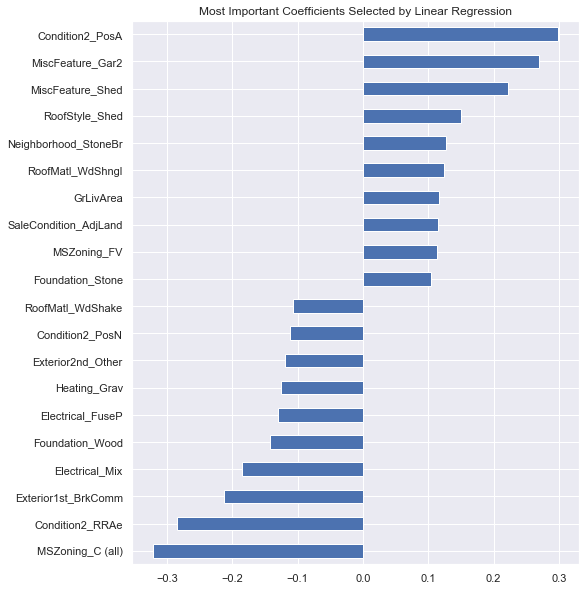

In [37]:
linearModel.fit(X_train, y)

coef = pd.Series(linearModel.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Most Important Coefficients Selected by Linear Regression")
plt.show()

In [38]:
from sklearn.linear_model import Ridge

# RMSE for ridge regression model with alpha = 0.1
ridgeModel = Ridge(alpha = 0.1)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.12019455874717529, std: 0.007454906263589799


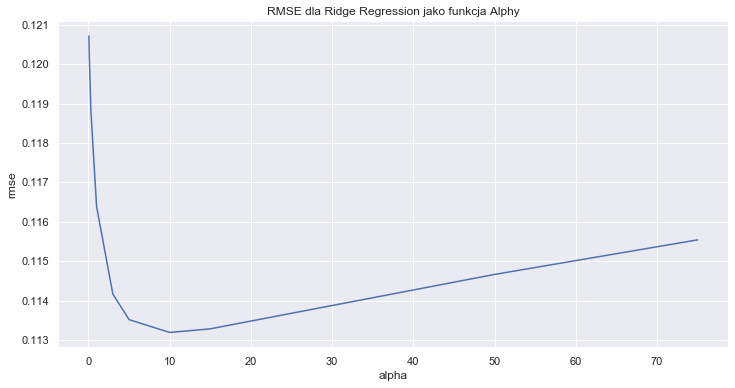

In [39]:
rcParams['figure.figsize'] = (12.0, 6.0)

# RMSE dla kilku wartości alpha 
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

# plot RMSE vs alpha
cv_ridge.plot(title = "RMSE dla Ridge Regression jako funkcja Alphy")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

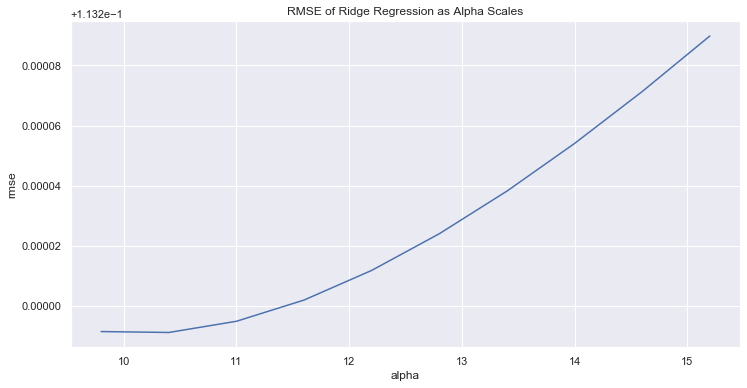

In [41]:
rcParams['figure.figsize'] = (12.0, 6.0)

alphas = np.linspace(9.8, 15.2, 10)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge.plot(title = "RMSE of Ridge Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [42]:
optimalRidgeAlpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]
print("Optimal ridge alpha: {}".format(optimalRidgeAlpha))

Optimal ridge alpha: 10.4


In [43]:
ridgeModel = Ridge(alpha = optimalRidgeAlpha)
rmse = rmse_cv(ridgeModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.11319118019002325, std: 0.0057525968789984535


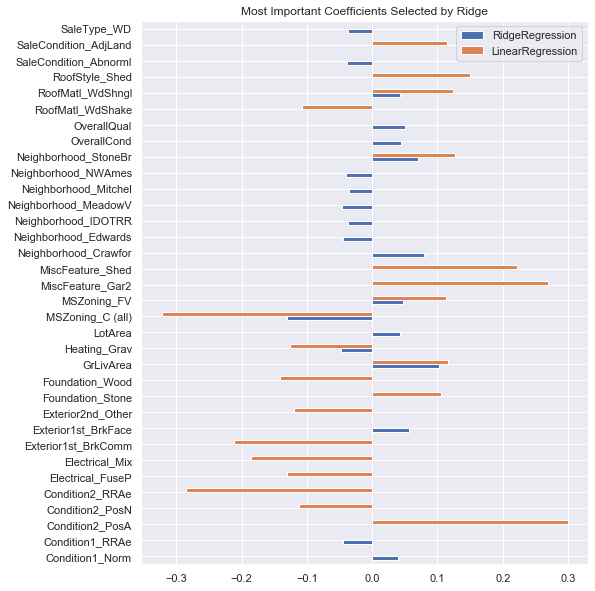

In [44]:
ridgeModel.fit(X_train, y)

ridge_coef = pd.Series(ridgeModel.coef_, index = X_train.columns)
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(10), ridge_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0)
df = pd.DataFrame({ "RidgeRegression" : ridge_imp_coef, "LinearRegression" : imp_coef })
df.plot(kind = "barh")
plt.title("Most Important Coefficients Selected by Ridge")
plt.show()

In [45]:
from sklearn.linear_model import Lasso

lassoModel = Lasso(alpha = 0.1)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.20121129767620344, std: 0.005996638264050697


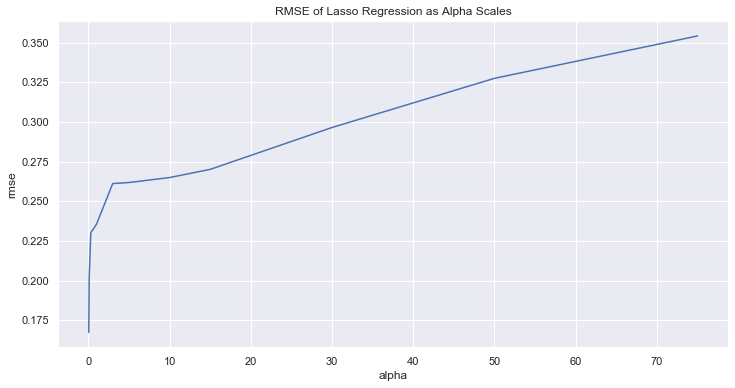

In [47]:
from sklearn.linear_model import Lasso

rcParams['figure.figsize'] = (12.0, 6.0) # define size of figure

# RMSE dla kilku alpha
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

# plot RMSE vs alpha
cv_lasso.plot(title = "RMSE of Lasso Regression as Alpha Scales")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [48]:
from sklearn.linear_model import LassoCV

# use built in LassoCV function to select best model for data
lassoModel = LassoCV(alphas = np.linspace(0.0002, 0.0022, 21), cv = 5).fit(X_train, y)
lassoModel.alpha_

optimalLassoAlpha = lassoModel.alpha_
print("Optimal lasso alpha: {}".format(optimalLassoAlpha))

Optimal lasso alpha: 0.0004


In [56]:
# 'alpha' jest karą związaną z uwzględnieniem kolumny
# Dobre ćwiczenie: zmieniać wartości parametru i sprawdzać jak wygląda liczba uwzględnionych kolumn + słupki na wykresie poniżej
#lassoModel = Lasso(alpha = optimalLassoAlpha)
lassoModel = Lasso(alpha = 0.01)
rmse = rmse_cv(lassoModel)
print("RMSE estimate: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE estimate: 0.12697917954615354, std: 0.005341401765412541


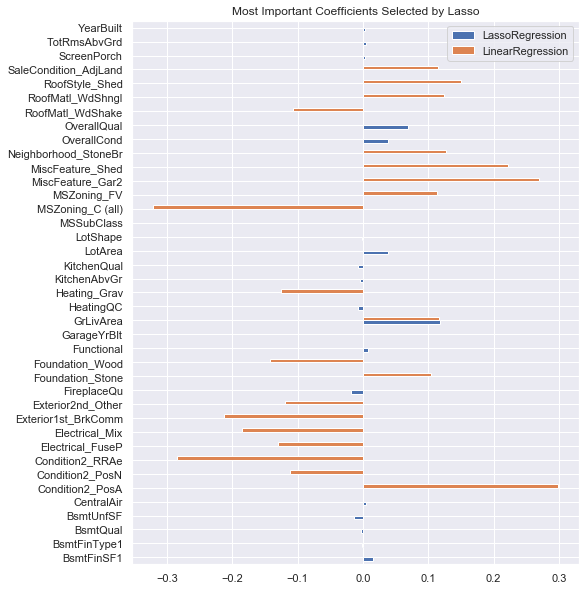

In [57]:
# fit lasso model
lassoModel.fit(X_train, y)

# get largest magnitude coefficients
lasso_coef = pd.Series(lassoModel.coef_, index = X_train.columns)
lasso_imp_coef = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0) # define size of figure
df = pd.DataFrame({ "LassoRegression" : lasso_imp_coef, "LinearRegression" : imp_coef })
df.plot(kind = "barh")
plt.title("Most Important Coefficients Selected by Lasso")
plt.show()

In [58]:
lasso_coef = pd.Series(lassoModel.coef_, index = X_train.columns)
print(sum(lasso_coef != 0))
print(sum(lasso_coef == 0))

23
196


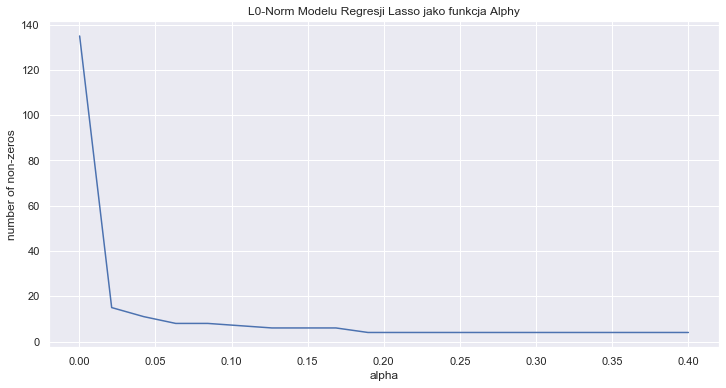

In [60]:
# L0-Norm
# skalowanie alpha
alphas = np.linspace(0.0002, 0.4002, 20)
nonZeros = []

# dla każdej alpha, wytrenuj model an danych treningowych
for alpha in alphas:
    lassoModel = Lasso(alpha = alpha).fit(X_train, y)
    coef = pd.Series(lassoModel.coef_, index = X_train.columns)
    nonZeros = np.append(nonZeros, sum(coef != 0))

# plot liczbę niezerowych współczynników (L0-Norm) vs alpha
rcParams['figure.figsize'] = (12.0, 6.0)
lzeroNorm = pd.Series(nonZeros, index = alphas)
lzeroNorm.plot(title = "L0-Norm Modelu Regresji Lasso jako funkcja Alphy")
plt.xlabel("alpha")
plt.ylabel("number of non-zeros")
plt.show()

In [61]:
lzeroNorm.max()

135.0

In [62]:
lzeroNorm.min()

4.0

In [63]:
# Predykcja
linearModel = LinearRegression().fit(X_train, y)
lr_submission = pd.DataFrame()
lr_submission['Id'] = test['Id']
lr_submission['SalePrice'] = np.expm1(linearModel.predict(X_test))
lr_submission.to_csv('linear-regression.csv', index=False)

In [ ]:
import pickle
ridgeModel = Ridge(alpha = optimalRidgeAlpha).fit(X_train, y)
filename = 'Ridge_model.sav'
pickle.dump(ridgeModel, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
ridge_submission = pd.DataFrame()
ridge_submission['Id'] = test['Id']
ridge_submission['SalePrice'] = np.expm1(loaded_model.predict(X_test))
ridge_submission.to_csv('ridge.csv', index=False)

In [ ]:
ridge_submission.SalePrice

In [ ]:
lassoModel = Lasso(alpha = optimalLassoAlpha).fit(X_train, y)
filename = 'Lasso_model.sav'
pickle.dump(lassoModel, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
lasso_submission = pd.DataFrame()
lasso_submission['Id'] = test['Id']
lasso_submission['SalePrice'] = np.expm1(loaded_model.predict(X_test))
lasso_submission.to_csv('lasso.csv', index=False)

In [ ]:
lasso_submission['SalePrice']